# IMPORT

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import physio
import ghibtools as gh
from configuration import *

# RUN KEYS & LISTS

In [3]:
participants_label = {
    'P01':'DB01', # OK
    'P02':'FB02', # OK
    'P03':'ZB03', # OK
    'P04':'EM04', # OK
    'P05':'TM05', # OK
    'P06':'AC06', # OK
    'P07':'CB07', # OK
    'P08':'ZB08', # OK
    'P09':'MA09', # OK
    'P10':'AA10', # OK
    'P11':'MB11', # OK
    'P12':'AP12', # OK
    'P13':'ZC13', # OK
    'P14':'FC14', # OK
    'P15':'AP15', # OK
    'P16':'EP16', # OK
    'P17':'AG17', # OK
    'P18':'MP18', # OK
    'P19':'SR19', # OK
    'P20':'MV20', # OK
    'P21':'GA21', # OK
    'P22':'SB22', # OK
    'P23':'PB23', # OK
    'P24':'MB24', # OK
    'P25':'MB25', # OK
    'P26':'EZ26', # OK
    'P27':'AM27', # OK
    'P28':'MC28', # OK
    'P29':'ML29', # OK
    'P30':'EG30', # OK
    'P31':'MG31' # OK
    }

subs = ['P01','P02','P03','P04','P05',
                'P06','P07','P08','P09','P10',
                'P11','P12','P13','P14','P15',
                'P16','P17','P18','P19','P20',
                'P21','P23','P24','P25', # P22 not in list because artifacted
                'P26','P27','P28','P29','P30','P31']

sess = ['baseline','music','odor']

points_per_cycle = 100
phase = np.linspace(0, 1, points_per_cycle)

# PLOT DEFORMED CYCLES

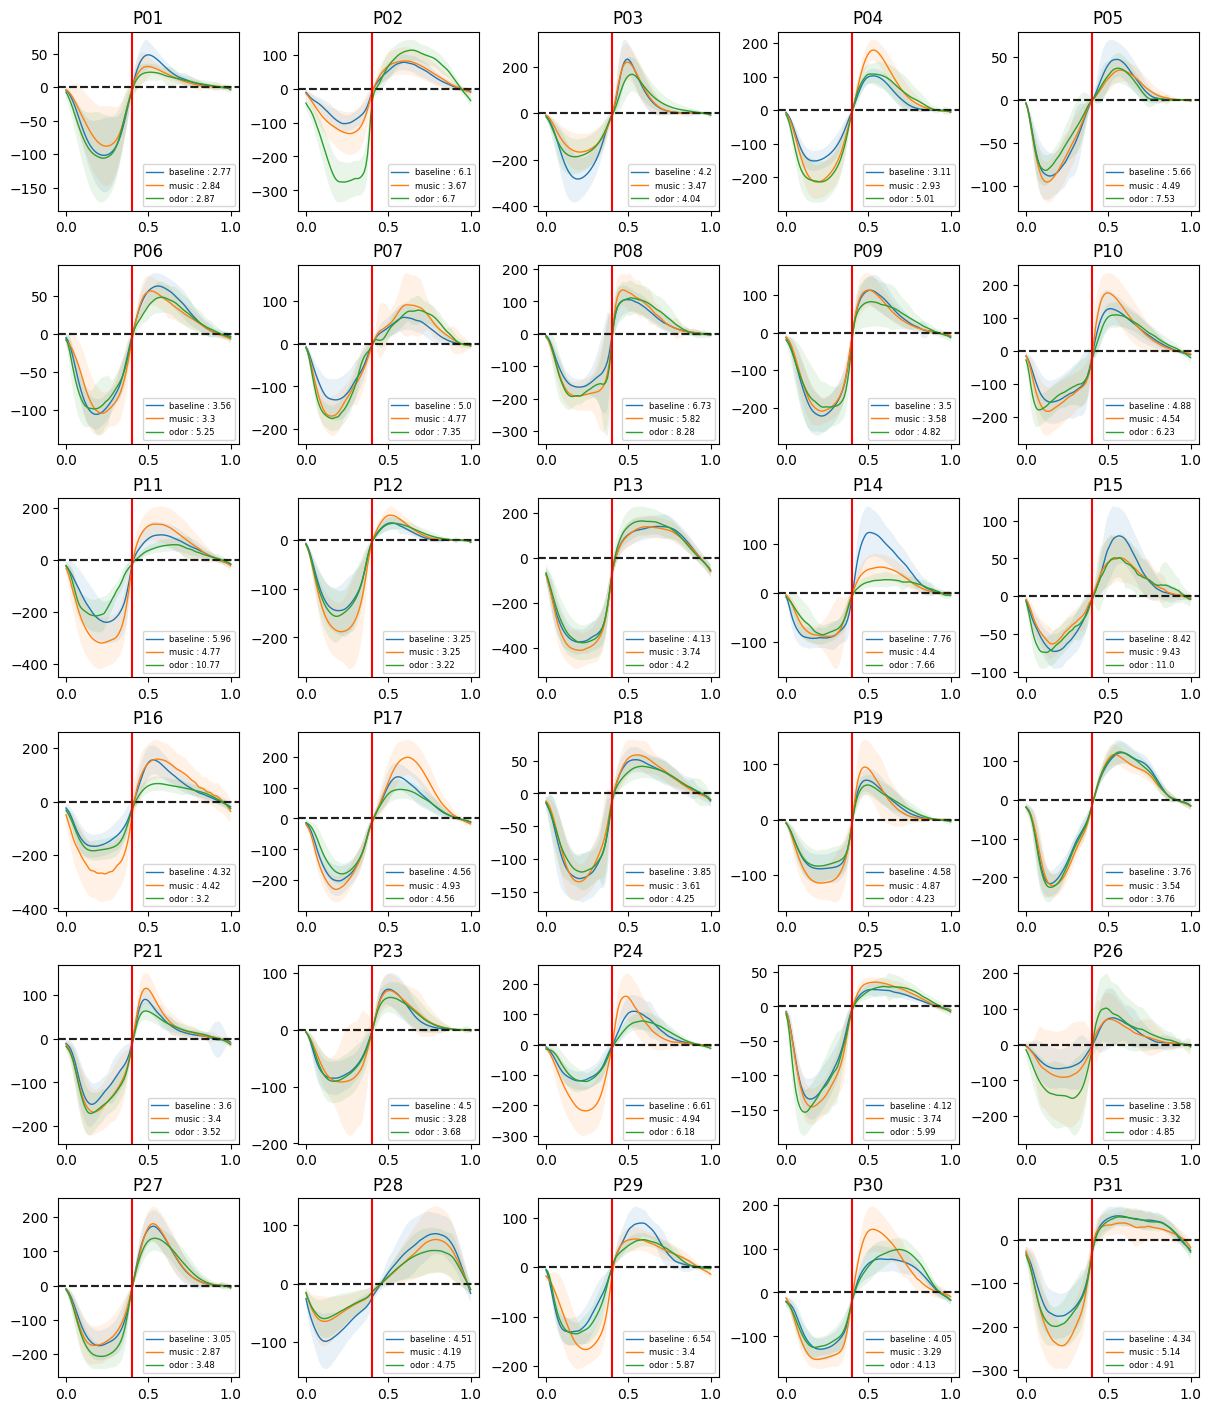

In [32]:
%matplotlib inline

nrows = 6
ncols = 5
subplots = gh.attribute_subplots(subs, nrows = 6, ncols = 5)

fig, axs = plt.subplots(nrows, ncols, figsize = (12,14), constrained_layout = True)

for sub, pos in subplots.items():
    ax = axs[pos[0], pos[1]]
    sub_fullname = participants_label[sub]
    
    for ses in sess:
        filename = data_path / sub / 'signaux' / f'sub{sub_fullname}_{ses}.vhdr'  
        raw_resp, srate = physio.read_one_channel(filename, 'brainvision', 'RespiNasale')

        times = np.arange(raw_resp.size) / srate
        
        resp, resp_features = physio.compute_respiration(-raw_resp, srate, parameter_preset = 'human_airflow')
        duration = resp_features['cycle_duration'].median()
        cycle_times = resp_features[['inspi_time','expi_time','next_inspi_time']].values
        # segment_ratios = resp_features['cycle_ratio'].median()
        segment_ratios = 0.4
        
        stacked_cycles = physio.deform_traces_to_cycle_template(resp,
                                               times,
                                               cycle_times,
                                               points_per_cycle,
                                               segment_ratios
                                              )

        stacked_cycles = (stacked_cycles.T - np.median(stacked_cycles, axis = 1)).T # centering
        phase = np.linspace(0, 1, stacked_cycles.shape[1])
        m = np.mean(stacked_cycles, axis = 0)
        s = np.std(stacked_cycles, axis = 0)
        ax.fill_between(phase, m-s, m+s, alpha = 0.1)
        ax.plot(phase, m, label = f'{ses} : {round(duration, 2)}', lw = 1)
        ax.axhline(0, ls = '--', color = 'k', alpha = 0.5)
    
    ax.set_title(sub)    
    ax.axvline(segment_ratios, color = 'r')
    ax.legend(loc = 4, fontsize = 6)
# fig.savefig(base_folder / 'Figures' / 'resp_features' / 'deformed_nasal_traces.png', dpi = 500, bbox_inches = 'tight')
plt.show()